<a href="https://colab.research.google.com/github/ColdCoffee21/Python_OpenLab/blob/main/Graph_Traversals_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [28]:
class Vertex():
    def __init__(self, key):
        self.key = key
        self.neighbors = {}

    def add_neighbor(self, neighbor, weight=0):
        self.neighbors[neighbor] = weight

    def delete_neighbor(self, neighbor):
        try:
            return self.neighbors.pop(neighbor)
        except KeyError:
            return None

    def clear_neighbors(self):
        try:
            return self.neighbors.clear()
        except KeyError:
            return None

    def __str__(self):
        return '{} neighbors: {}'.format(self.key,[x.key for x in self.neighbors])

    def __iter__(self):
        return iter(self.get_connections())

    def get_connections(self):
        return self.neighbors.keys()

    def get_weight(self, neighbor):
        return self.neighbors[neighbor]

    def get_neighbor(self):
        return self.neighbors

In [29]:
class Graph():
    def __init__(self):
        self.verticies = {}
        #self.G = nx.Graph()    #Used for visualisation
        self.G = nx.DiGraph()   #Used for visualisation of directed graph
        self.adjMatrix=[]
        self.size=0             #Adjacency Matrix

    def add_vertex(self, vertex):
        self.verticies[vertex.key] = vertex
        self.G.add_node(vertex.key)
        self.size+=1
    
    def delete_vertex(self, vertex):
        try:
            self.G.remove_node(vertex.key)
            vert = self.verticies.pop(vertex.key)
            vert.clear_neighbors()
            self.size-=1
            return vert
        except KeyError or NetworkXError:
            return None

    def get_vertex(self, key):
        try:
            return self.verticies[key]
        except KeyError:
            return None

    def __contains__(self, key):
        return key in self.verticies

    def add_edge(self, from_key, to_key, weight=0):
        if from_key not in self.verticies:
            self.add_vertex(Vertex(from_key))
        if to_key not in self.verticies:
            self.add_vertex(Vertex(to_key))
        self.G.add_edge(from_key, to_key)
        self.verticies[from_key].add_neighbor(self.verticies[to_key], weight)
        

    def delete_edge(self, from_key, to_key, weight=0):
        if from_key not in self.verticies:
            return None
        if to_key not in self.verticies:
            return None
        self.G.remove_edge(from_key, to_key)
        return self.verticies[from_key].delete_neighbor(self.verticies[to_key])


    def get_vertices(self):
        return self.verticies.keys()

    def __iter__(self):
        return iter(self.verticies.values())
    
    #currVertex is a vertex key
    def DFS(self,currVertex):
        if(currVertex not in self.verticies.keys()):
          return None
        node_pos = nx.spring_layout(self.G, seed = 75)
        visited = {x: False for x in self.verticies} 
        stack = []
        stack.append(currVertex) 
        while (len(stack)): 
            currVertex = stack.pop()
            if (not visited[currVertex]): 
                print(currVertex,end=' ')
                #print(self.verticies[currVertex])
                visited[currVertex] = True
                self.visualiseVisited(visited, node_pos)
            for neighbor in self.verticies[currVertex]:
                if (not visited[neighbor.key]): 
                    stack.append(neighbor.key) 

    def visualiseVisited(self, visited, nodePos):
        color_map = []
        for node in visited:
            if visited[node] == False:
                color_map.append('r')
            else: 
                color_map.append('green')      
        nx.draw_networkx(self.G, node_color=color_map, pos = nodePos, with_labels=True)
        plt.show()

    def BFS(self,currVertex):
            visited = {x: False for x in self.verticies}      # Mark all the vertices as not visited
            queue = []                                        # Create a queue for BFS
            queue.append(currVertex)
            node_pos = nx.spring_layout(self.G, seed = 75)    # Mark the source node as 
            self.visualiseVisited(visited, node_pos)
            
            visited[currVertex] = True                        # visited and enqueue it
            print(currVertex)                     
            self.visualiseVisited(visited, node_pos)
          

            while queue:
                currVertex = queue.pop(0)                       # Dequeue a vertex from 
                #print (currVertex, end = " ")
                                                                # queue and print it
                for i in self.verticies[currVertex]:            # Get all adjacent vertices of the
                    if visited[i.key] == False:                 # dequeued vertex s. If a adjacent
                        queue.append(i.key)                     # has not been visited, then mark it
                        visited[i.key] = True
                        print(i.key, end = " ")
                        self.visualiseVisited(visited, node_pos)# visited and enqueue it


    def visualize(self):
      try:
        my_pos = nx.spring_layout(self.G, seed = 75)
        nx.draw_networkx(self.G, pos = my_pos)
        #nx.draw_networkx(self.G) 
        plt.show()
      except AttributeError:
            return None

    #Graph Representations need to be edited
    def length(self):
      return self.size

    def adjmat(self):
      
      for i in range(self.size):
        self.adjMatrix.append([0 for i in range(self.size)])
      
      for i in self.verticies.keys():
        
        s=self.get_vertex(i).__str__()
        for j in self.verticies.keys():
          
          if str(j) in self.get_vertex(i).__str__() and str(j)!=s[0]:
            if max(i,j)>=len(self.adjMatrix):
              self.adjMatrix=self.expand(self.adjMatrix,max(i,j)+1)
            self.adjMatrix[i][j]=1

      for i in range(len(self.adjMatrix)):
        for j in range(len(self.adjMatrix[i])):
          print(self.adjMatrix[i][j],end=" ")
        print()
        
     
    
    def adjlist(self):
      for i in self.verticies.keys():
        print("Attribute list for vertex ",end=" ")
        print(i)
        print("head" ,end= "->")
        
        for j in self.get_vertex(i).get_neighbor():
          print(j.key,end=" -> ")
        
        print("None")
            
      
    def expand(self,mat,n):
      nm=[[0]*n for i in range(n)]
      for i in range(len(mat)):
        for j in range(len(mat[i])):
          nm[i][j]=mat[i][j]
      return nm

##Testing Basic Graph functions and visualisation

Functions tested - adding/deleting Vertex, adding/deleting Edges

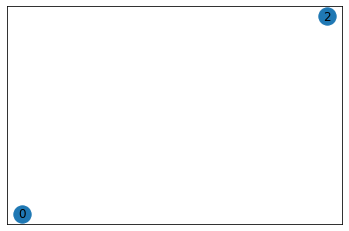

In [30]:
# Driver code 
G = Graph()
G.add_vertex(Vertex(0))
G.add_vertex(Vertex(2))
G.visualize()

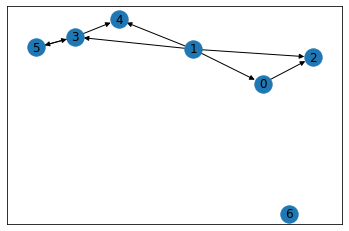

In [31]:
G.add_edge(0, 2) 
G.add_edge(1, 2) 
G.add_edge(1, 3) 
G.add_edge(5, 3) 
G.add_edge(3, 5) 
G.add_edge(3, 4) 
G.add_edge(1, 0) 
G.add_edge(1, 4)
G.add_vertex(Vertex(6))
G.visualize() 

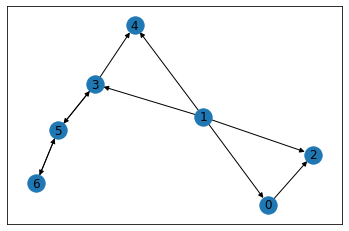

In [32]:
G.add_edge(6, 5)
G.add_edge(5, 6)
G.visualize() 

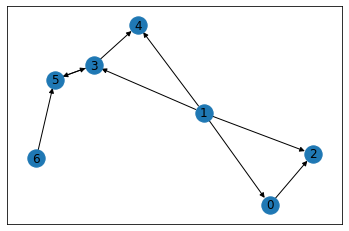

In [33]:
G.delete_edge(5,6)
G.visualize()

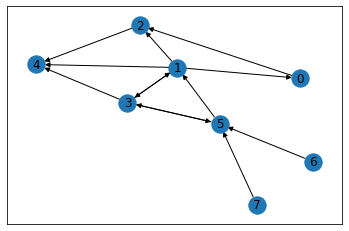

In [34]:
G.add_edge(7, 5)
G.add_edge(5, 1)
G.add_edge(3, 1)
G.add_edge(2, 4)
G.visualize()

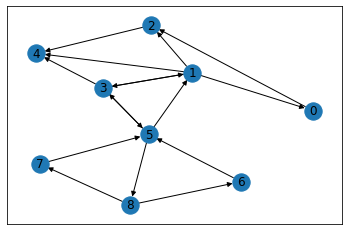

In [39]:
G.add_edge(5, 8)
G.add_edge(8, 7)
G.add_edge(8, 6)
G.visualize()

###Graph Representations

####Adjacency Matrix

In [35]:
G.adjmat()

0 0 1 0 0 0 0 0 
1 0 1 1 1 0 0 0 
0 0 0 0 1 0 0 0 
0 1 0 0 1 1 0 0 
0 0 0 0 0 0 0 0 
0 1 0 1 0 0 0 0 
0 0 0 0 0 1 0 0 
0 0 0 0 0 1 0 0 


####Adjacency List

In [36]:
G.adjlist()

Attribute list for vertex  0
head->2 -> None
Attribute list for vertex  2
head->4 -> None
Attribute list for vertex  1
head->2 -> 3 -> 0 -> 4 -> None
Attribute list for vertex  3
head->5 -> 4 -> 1 -> None
Attribute list for vertex  5
head->3 -> 1 -> None
Attribute list for vertex  4
head->None
Attribute list for vertex  6
head->5 -> None
Attribute list for vertex  7
head->5 -> None


##Depth First Search 

1 

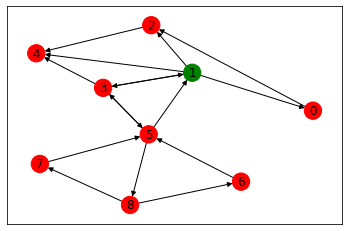

4 

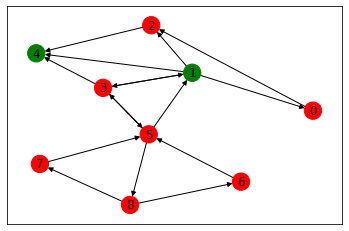

0 

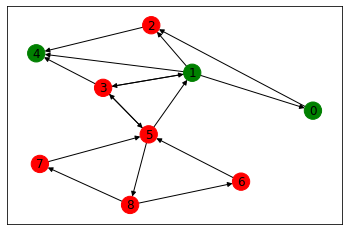

2 

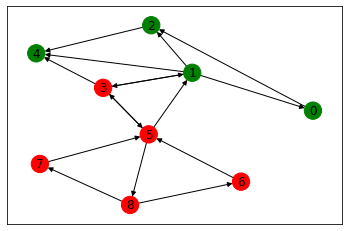

3 

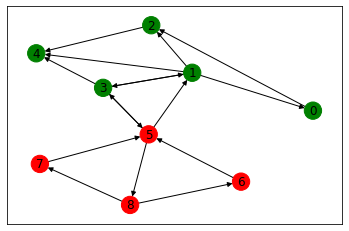

5 

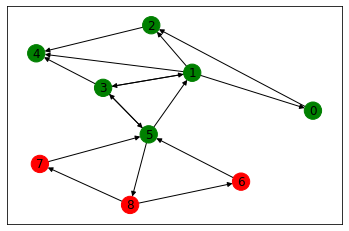

8 

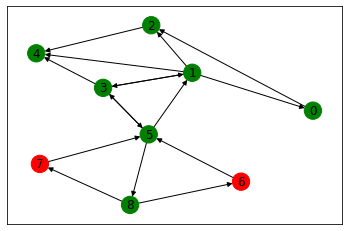

6 

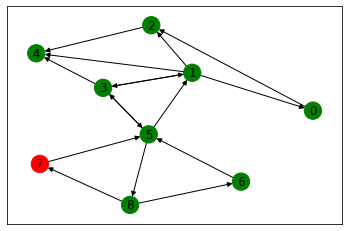

7 

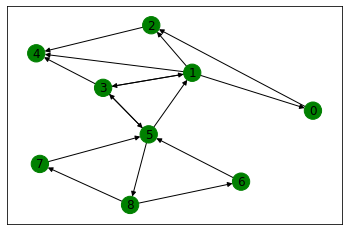

In [40]:
G.DFS(1)

##Breadth First Search 

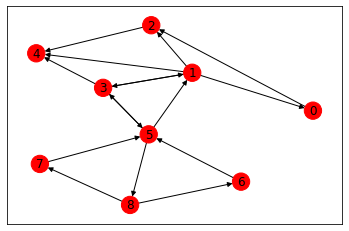

1


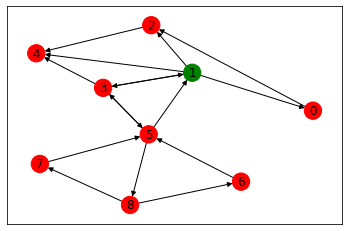

2 

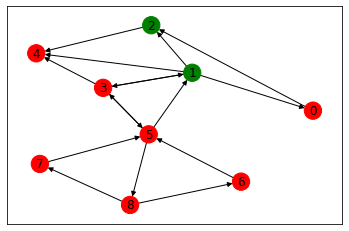

3 

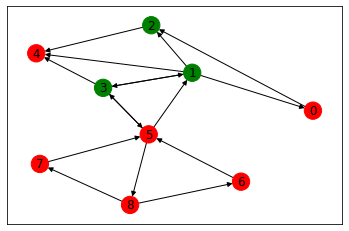

0 

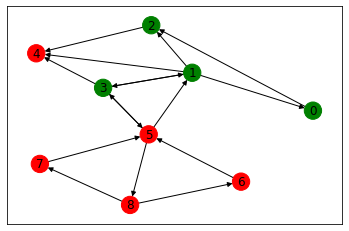

4 

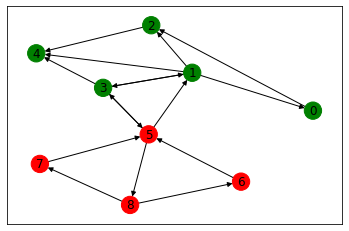

5 

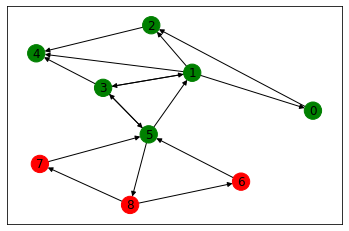

8 

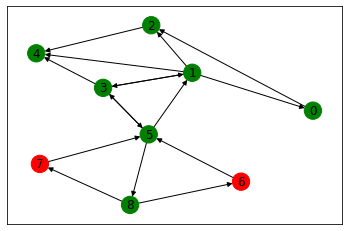

7 

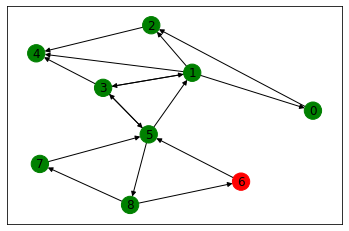

6 

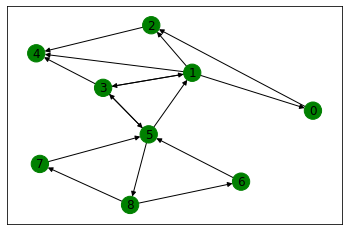

In [41]:
G.BFS(1)

In [ ]:
#Get input, i.e, data for vertices?
#Input for edge labels?
#bfs,dfs, representation
#Mix the menu driven program